In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing_data = pd.read_csv("train.csv", encoding = 'utf-8')
housing_data.head(10)
housing_data.shape

(1460, 81)

In [3]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

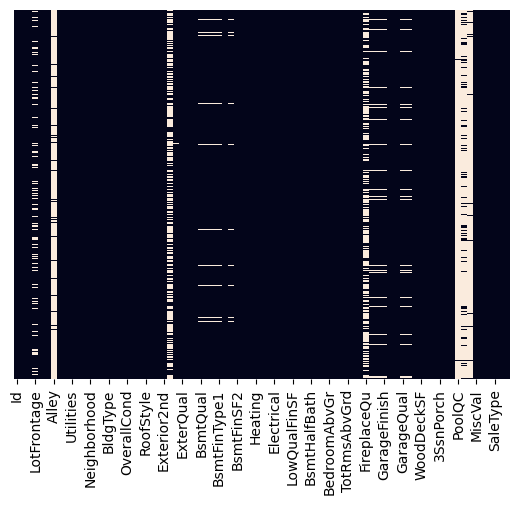

In [5]:
sns.heatmap(housing_data.isnull(),yticklabels= False,cbar=False)

In [6]:
### Finding the percentage of nulls in the columns
housing_data.columns[housing_data.isnull().any()] 

housing_data_null = housing_data.isnull().sum()/len(housing_data)*100
housing_data_null = housing_data_null[housing_data_null>0]
housing_data_null.sort_values(inplace=True, ascending=False)

In [7]:
housing_data_null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [8]:
### Put None in categorical columns
cols_to_update = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in cols_to_update:
    housing_data[i].fillna("none", inplace=True)

In [9]:
### Any more nulls to worry about
housing_data.columns[housing_data.isnull().any()] 

housing_data_null_chck = housing_data.isnull().sum()/len(housing_data)*100
housing_data_null_chck = housing_data_null_chck[housing_data_null_chck>0]
housing_data_null_chck.sort_values(inplace=True, ascending=False)

In [10]:
housing_data_null_chck

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [11]:
### "LotFrontage" is Linear feet of street connected to property. it can be imputed with similar 'Neighborhood' values
housing_data['LotFrontage'] = housing_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [12]:
### Can fill with median values for below 2 columns with no impact
housing_data["GarageYrBlt"].fillna(housing_data["GarageYrBlt"].median(), inplace=True)
housing_data["MasVnrArea"].fillna(housing_data["MasVnrArea"].median(), inplace=True)

In [13]:
### dropping Electrical column as it has no significance
housing_data["Electrical"].dropna(inplace=True)

In [14]:
### Dropping ID column and analyzing first the numeric columns
housing_data_num = housing_data.select_dtypes(include=['float64', 'int64'])
housing_data_num.head()
housing_data_num.drop(['Id'],axis=1,inplace=True)

In [15]:
housing_data.shape

(1460, 81)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

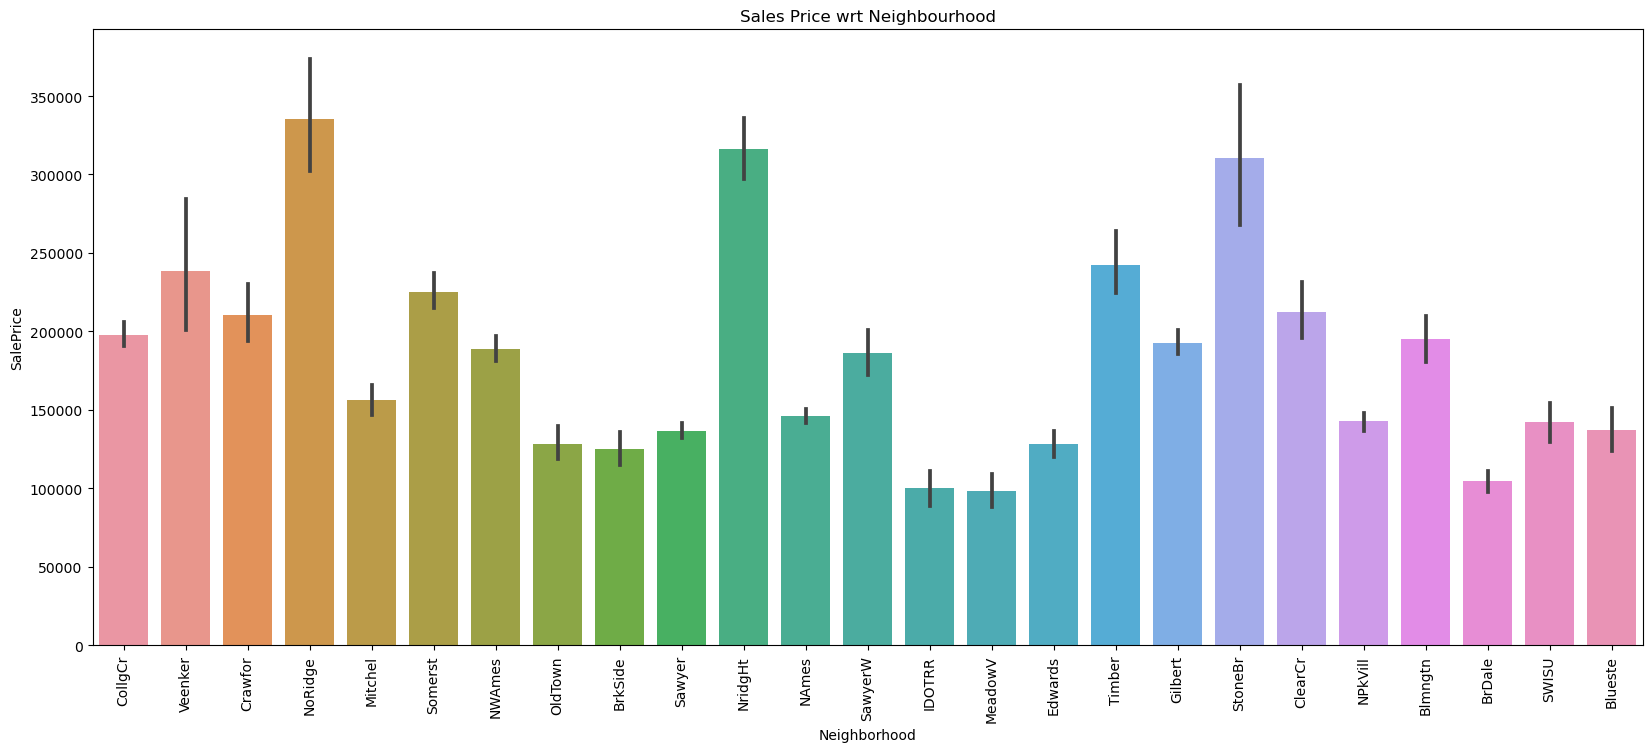

In [16]:
#  'Sale Price' wrt 'Neighborhood' to understand target variable changes with few independant variables

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing_data)
plt.title("Sales Price wrt Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

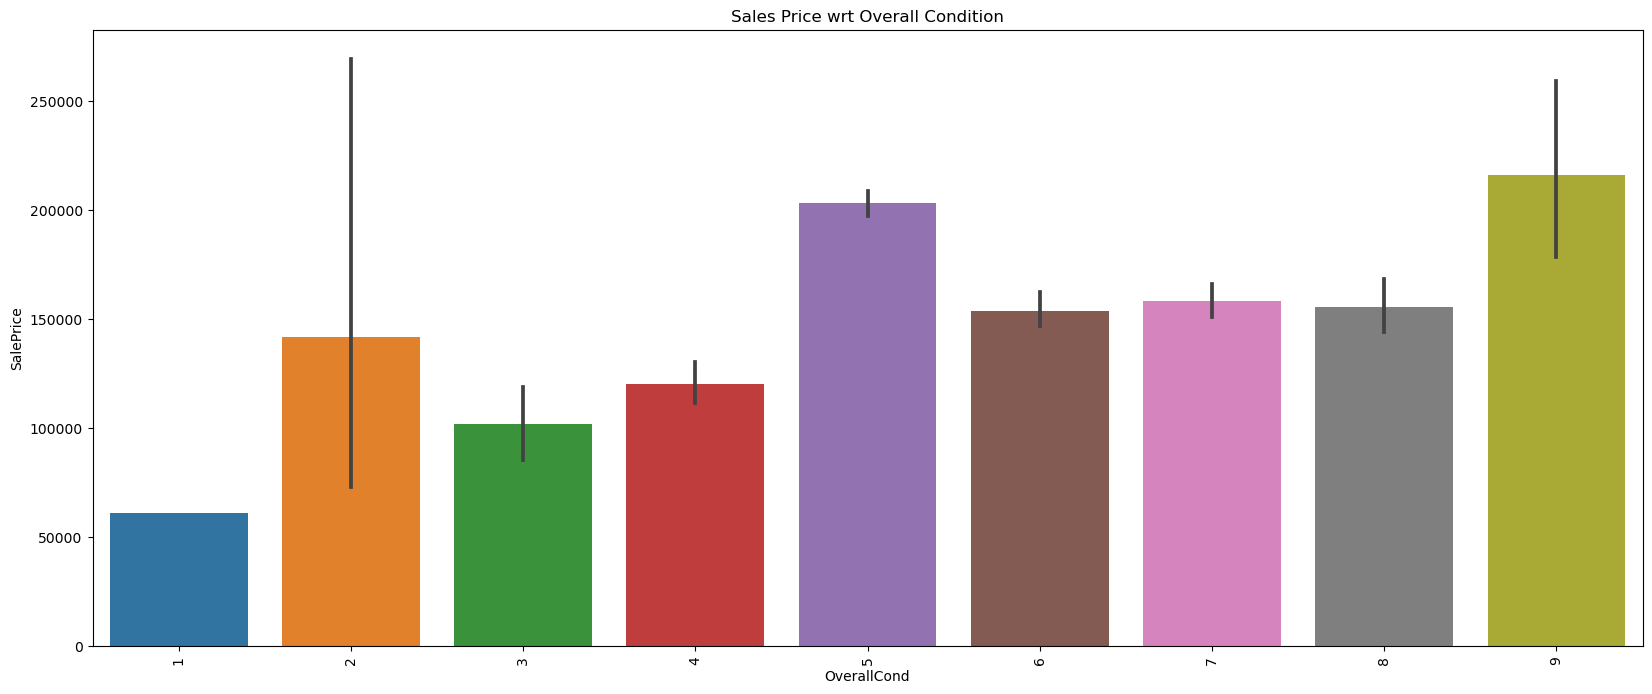

In [17]:
# Same for 'overall condition' wrt 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housing_data)
plt.title("Sales Price wrt Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

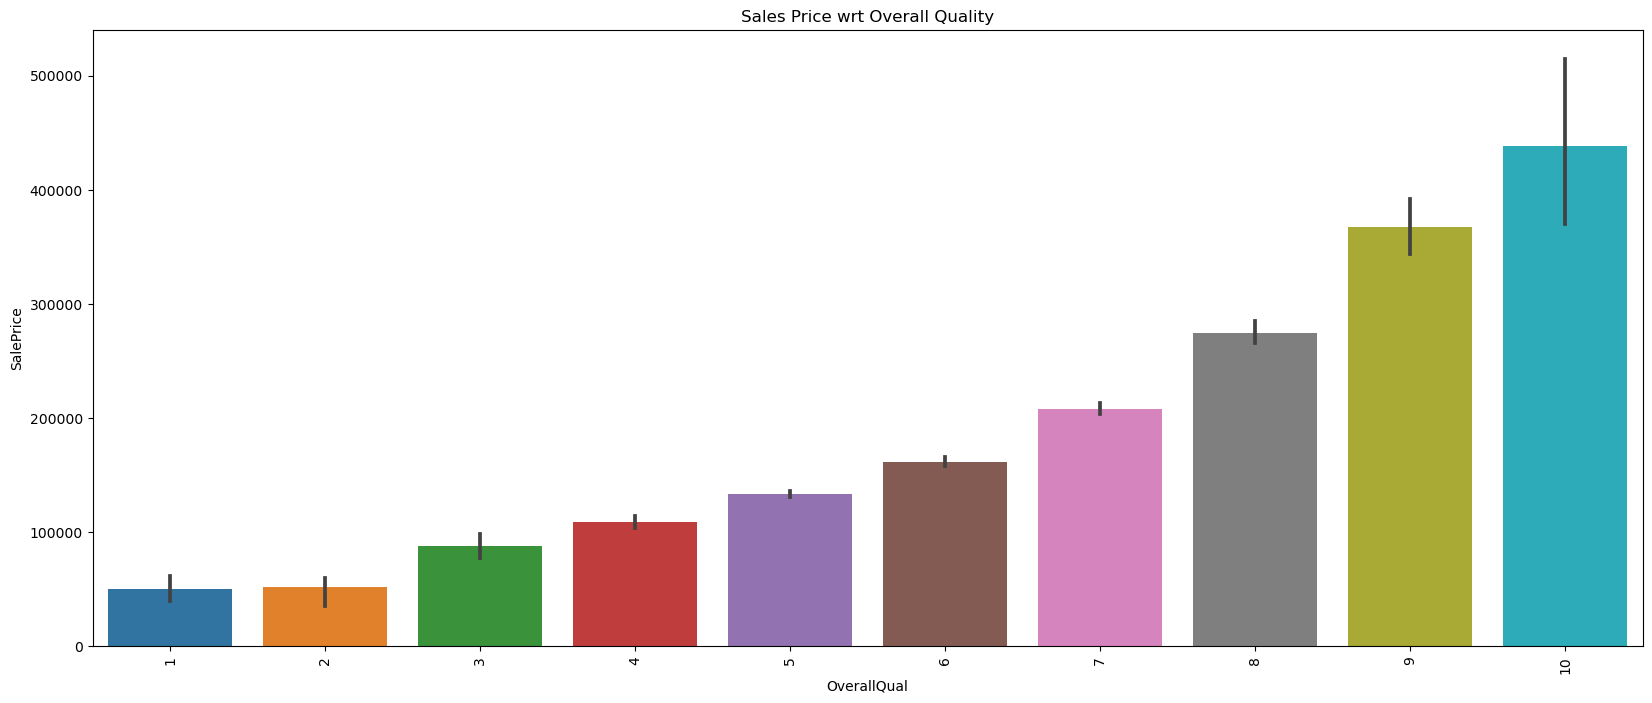

In [18]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housing_data)
plt.title("Sales Price wrt Overall Quality")
plt.xticks(rotation=90)

In [19]:
### Shown above is that Increase in the overall quality has a direct positive effect on the sale price

<Axes: xlabel='SalePrice', ylabel='Density'>

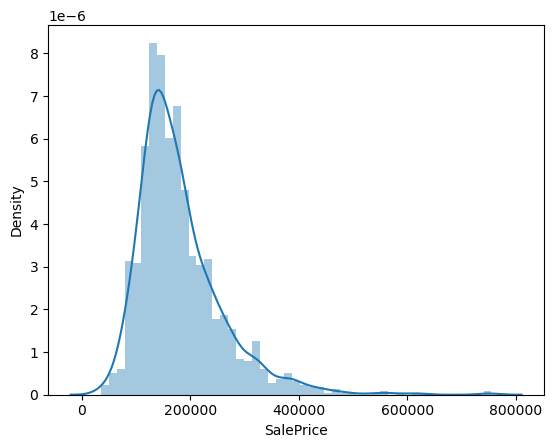

In [20]:
sns.distplot(housing_data['SalePrice'])

In [21]:
### Above distribution plot is skewed towards left so attempting now log transformation

In [22]:
housing_data['SalePrice']=np.log1p(housing_data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

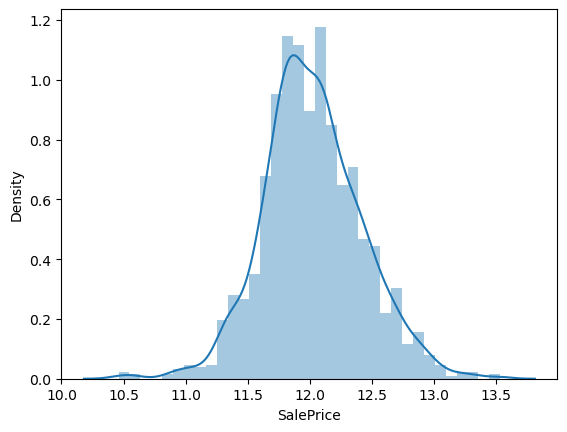

In [23]:
sns.distplot(housing_data['SalePrice'])

In [24]:
### As now centralized distribution is seen as above so let's check correlation matrix
cor = housing_data_num.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


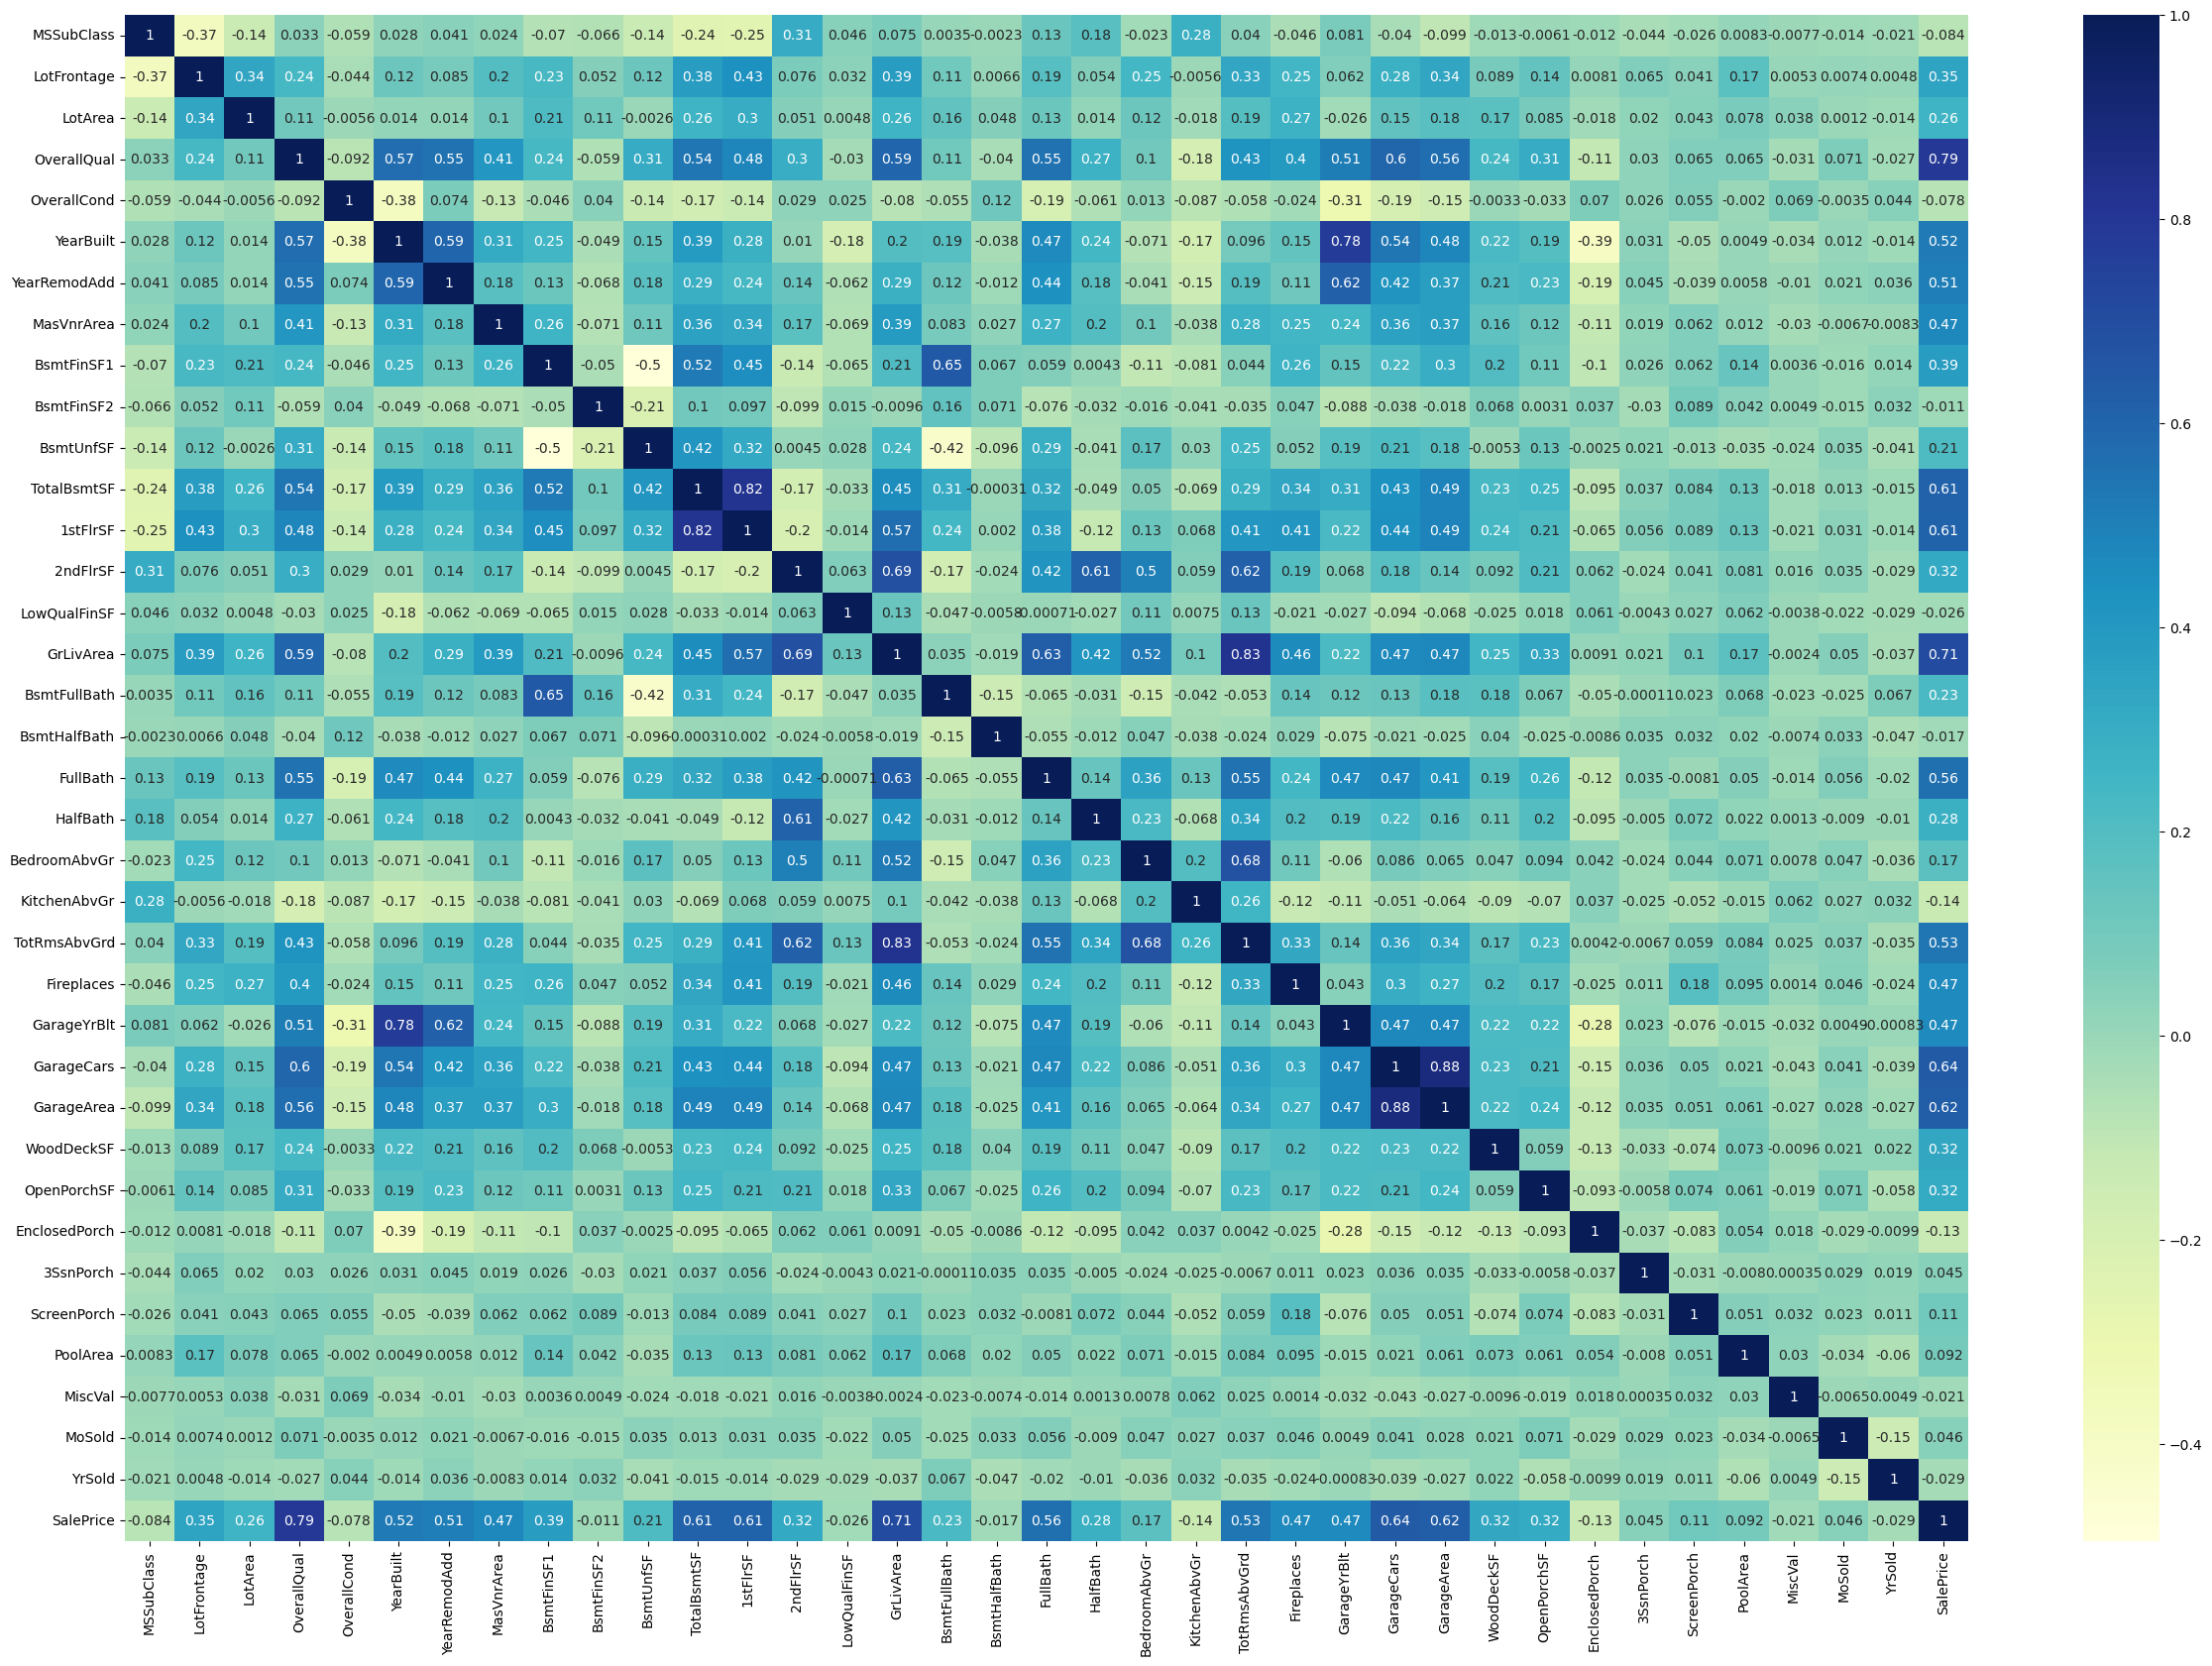

In [25]:
### Checking with heat map as well
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

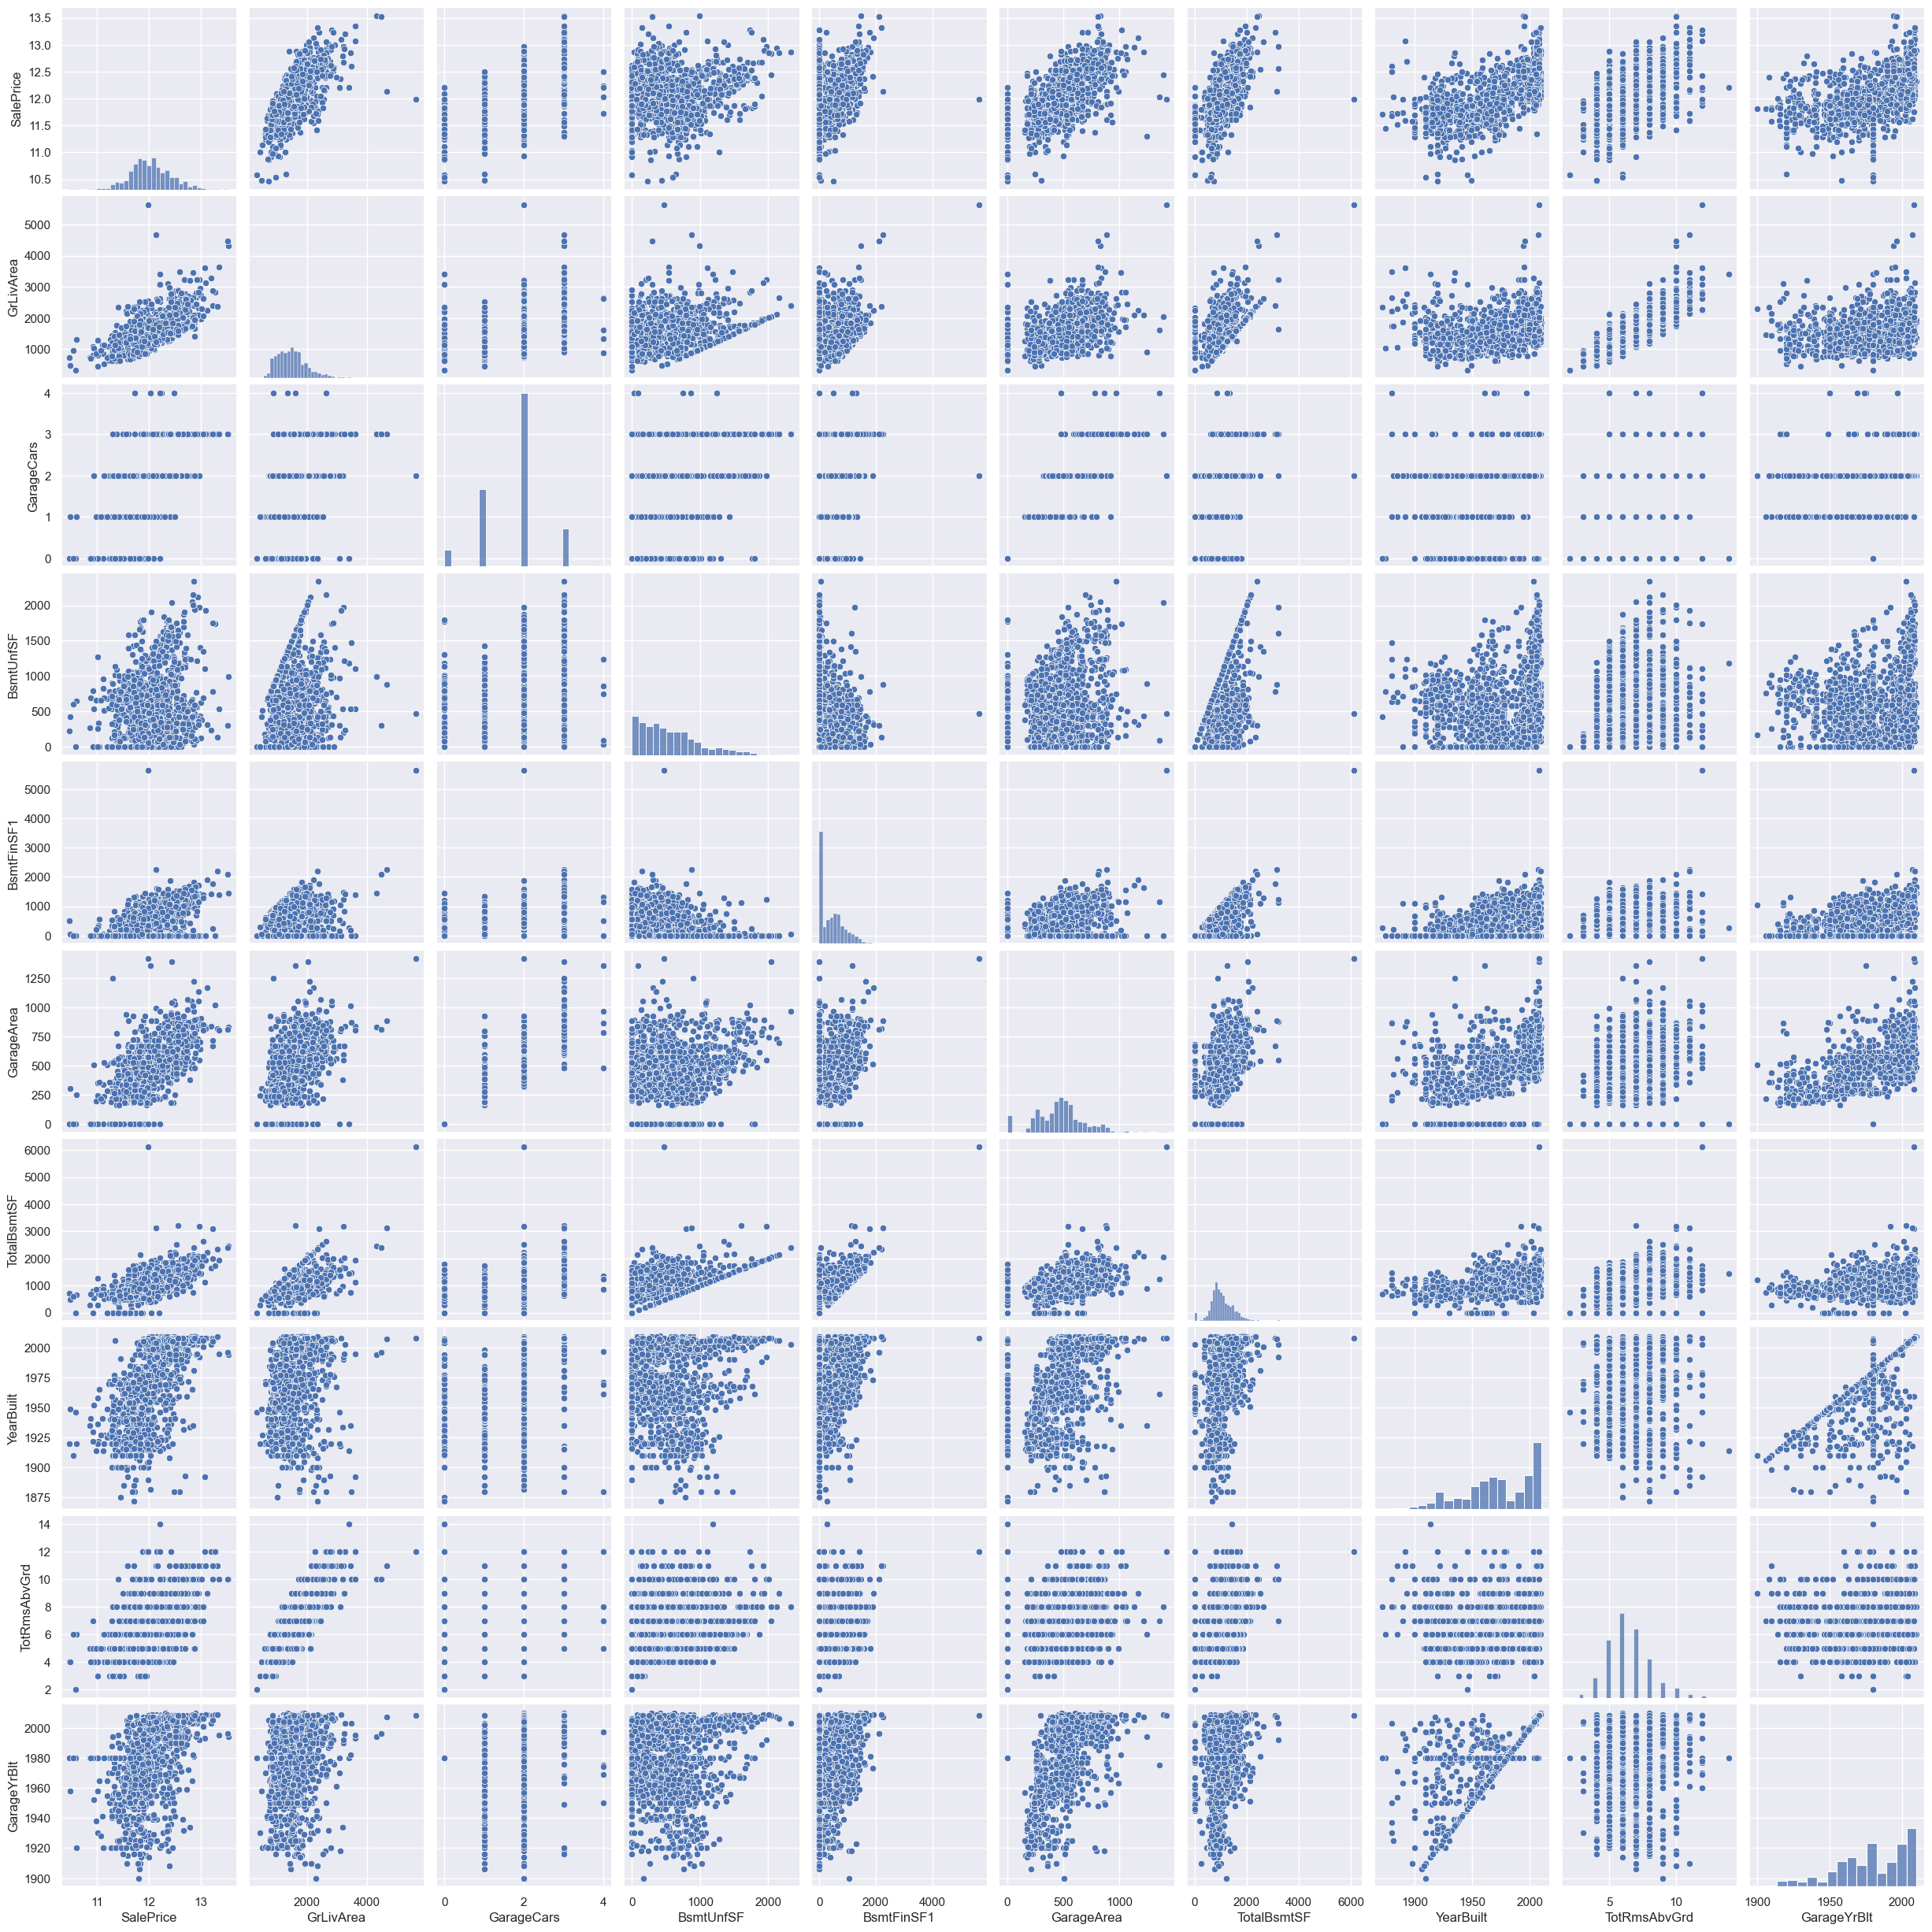

In [26]:
# Checking now with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing_data[cols], size = 2.5)
plt.show()

In [27]:
### Variables are correlated so dropping them after analyzing them via pair plot as above
housing_data = housing_data.drop(['GarageCars'], axis = 1)
housing_data = housing_data.drop(['BsmtUnfSF'], axis = 1)
housing_data = housing_data.drop(['TotRmsAbvGrd'], axis = 1)
housing_data = housing_data.drop(['GarageYrBlt'], axis = 1) 

In [28]:
housing_data.select_dtypes(exclude=['object']) ### Numeric checks

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,11.864469


In [29]:
# prAge  --> Property Age
housing_data['prAge'] = (housing_data['YrSold'] - housing_data['YearBuilt'])
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


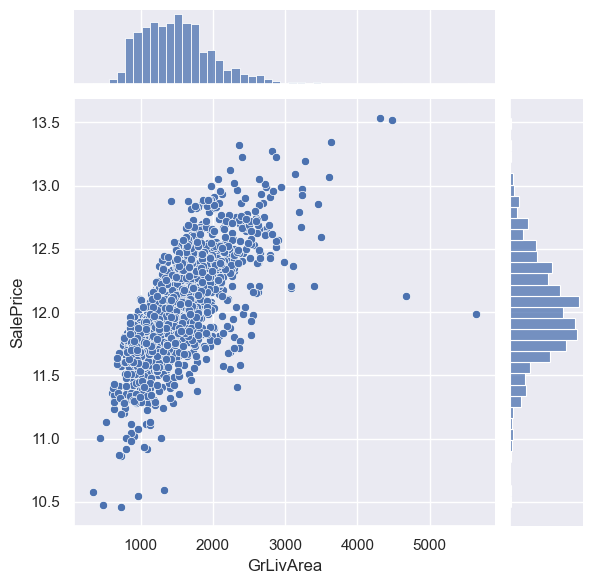

In [30]:
### Checking  numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=housing_data)
plt.show()

In [31]:
### Removing outliers

In [32]:
q1 = housing_data['GrLivArea'].quantile(0.25)
q3 = housing_data['GrLivArea'].quantile(0.75)
value = q3-q1
lower_value  = q1-1.5*value
higher_value = q3+1.5*value
housing_data= housing_data[(housing_data['GrLivArea']<higher_value) & (housing_data['GrLivArea']>lower_value)]

In [33]:
housing_data.shape

(1429, 78)

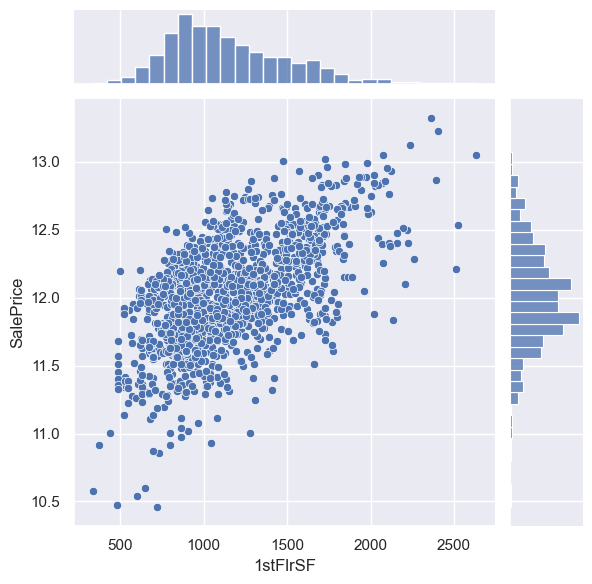

In [34]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = housing_data['1stFlrSF'], y = housing_data['SalePrice'])
plt.show()

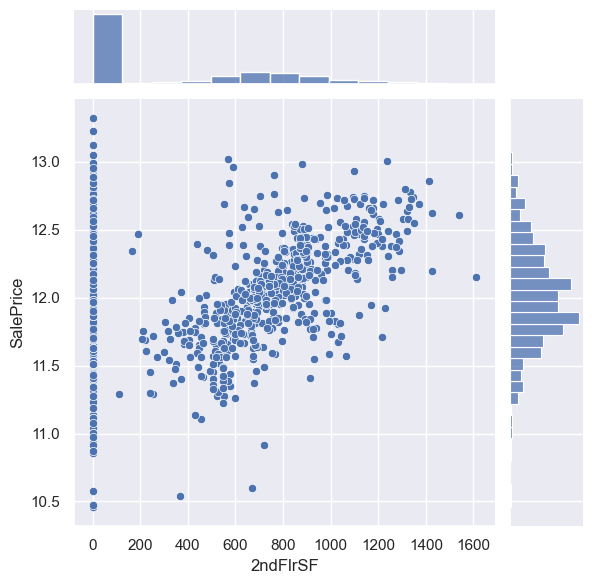

In [35]:
sns.jointplot(x = housing_data['2ndFlrSF'], y = housing_data['SalePrice'])
plt.show()

In [36]:
### First level houses i.e. '0' and second floor per Sq.Ft have  a steady increase

In [37]:
### Dropping columns having very less variance and significance eg. Id
housing_data = housing_data.drop(['Id'], axis=1)
housing_data = housing_data.drop(['Street'], axis = 1)
housing_data = housing_data.drop(['Utilities'], axis = 1)

In [38]:
### As Age of property is now derived so dropping the below columns

In [39]:
housing_data = housing_data.drop(['MoSold'], axis = 1)
housing_data = housing_data.drop(['YrSold'], axis = 1)
housing_data = housing_data.drop(['YearBuilt'], axis = 1)
housing_data = housing_data.drop(['YearRemodAdd'], axis = 1)

In [40]:
 housing_data = housing_data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)


In [41]:
#type of each feature in data: int, float, object
types = housing_data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [42]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

0
object     33
int64      26
float64     3
Name: count, dtype: int64

In [43]:
numerical_columns = list(numeric_type.index)

In [44]:
categorical_columns = list(categorical_type.index)

In [45]:
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'prAge']


In [46]:
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [47]:
housing_data = pd.get_dummies(housing_data, drop_first=True )
housing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,False,False,False,False,True,False,False,False,True,False


In [48]:
X = housing_data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,False,False,False,False,True,False,False,False,True,False


In [49]:
# Putting response variable to y
y = housing_data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [50]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'prAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'prAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'prAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'prAge']])


In [52]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.114594,0.003563,0.004702,0.000624,0.0001,{'alpha': 0.0001},-0.089742,-0.078917,-0.088496,-0.085739,...,-0.084023,0.005059,2,-0.065872,-0.068110,-0.065353,-0.066408,-0.067670,-0.066683,0.001050
1,0.024428,0.001524,0.004951,0.001111,0.001,{'alpha': 0.001},-0.082755,-0.083177,-0.087933,-0.082553,...,-0.083213,0.002670,1,-0.075478,-0.077009,-0.074278,-0.076496,-0.076136,-0.075880,0.000943
2,0.014492,0.001424,0.005251,0.000503,0.01,{'alpha': 0.01},-0.090790,-0.093399,-0.097715,-0.092036,...,-0.092514,0.003038,3,-0.091236,-0.090420,-0.089019,-0.090524,-0.091156,-0.090471,0.000796
3,0.013177,0.001289,0.004779,0.001277,0.05,{'alpha': 0.05},-0.129246,-0.113828,-0.132264,-0.112722,...,-0.120237,0.008648,4,-0.119298,-0.118718,-0.117623,-0.118882,-0.119586,-0.118822,0.000673
4,0.013775,0.002183,0.004808,0.000898,0.1,{'alpha': 0.1},-0.172055,-0.148653,-0.168033,-0.143888,...,-0.155762,0.011827,5,-0.155429,-0.155643,-0.153254,-0.153682,-0.156270,-0.154856,0.001174


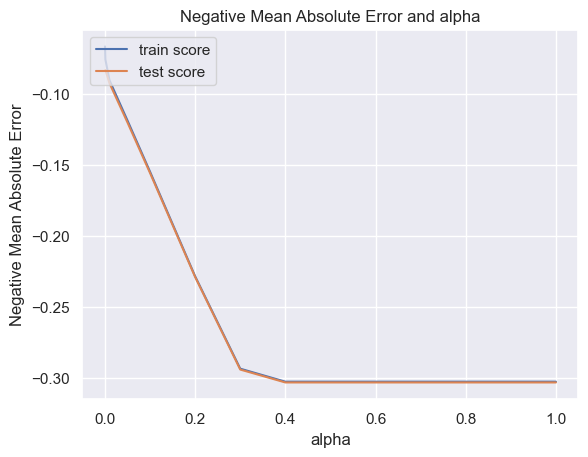

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00698318,  0.01385863,  0.01530092,  0.11219857,  0.04956005,
        0.        ,  0.03451586,  0.        ,  0.04155321,  0.        ,
        0.        , -0.        ,  0.12480705,  0.00976136,  0.        ,
        0.        ,  0.        , -0.        , -0.00805575,  0.02372561,
        0.033997  ,  0.00962824,  0.        ,  0.        ,  0.        ,
        0.00541322,  0.        , -0.0953824 ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [56]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.003),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.014),
 ('LotArea', 0.015),
 ('OverallQual', 0.112),
 ('OverallCond', 0.05),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.035),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.125),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.024),
 ('GarageArea', 0.034),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('prAge', -0.095),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0),


In [57]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8854624158407248
0.8894603158029369


In [58]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12573595366706633


In [59]:
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.003
1,MSSubClass,-0.007
2,LotFrontage,0.014
3,LotArea,0.015
4,OverallQual,0.112


In [60]:
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
pred = pd.DataFrame(para[(para['Coeff'] != 0)])

In [61]:
pred

,Variable,Coeff
0,constant,12.003
13,GrLivArea,0.125
4,OverallQual,0.112
5,OverallCond,0.050
9,TotalBsmtSF,0.042
7,BsmtFinSF1,0.035
21,GarageArea,0.034
20,Fireplaces,0.024
3,LotArea,0.015
2,LotFrontage,0.014


In [62]:
pred.shape

(17, 2)

In [63]:
print(list(pred['Variable']))

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'KitchenQual_TA', 'MSSubClass', 'KitchenAbvGr', 'prAge']


In [64]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]


In [65]:
X_train_lasso

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
11,1.923409,2.241710,-0.513939,0.345478,1.267298,1.323938,2.231812,0.154684,0.746261,1.131973,True,-0.351334,2.754667,-0.268919,0.485675
1070,-0.932170,-0.764271,-0.513939,0.030191,-0.857140,0.360916,-0.918240,-0.020017,0.130905,1.131973,False,-0.368801,-0.990631,3.351363,-0.758474
513,-0.860557,-0.012775,-0.513939,0.119563,0.077613,-0.223442,-0.918240,-0.115156,0.083570,-0.816345,True,-0.718144,-0.990631,-0.268919,0.257158
467,0.401627,-0.764271,1.258264,-0.764234,-0.734395,-0.106571,2.231812,-0.086269,0.462250,-0.816345,False,-0.718144,-0.990631,-0.268919,0.663411
993,0.079368,-0.012775,-0.513939,-0.709617,0.455291,-1.008820,-0.918240,-0.148775,-0.058435,-0.816345,True,-0.106794,0.882018,-0.268919,-0.758474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.108808,-0.012775,-0.513939,-0.436534,-0.130110,0.452076,2.231812,-0.246872,-0.200440,1.131973,True,0.120279,0.882018,-0.268919,1.679044
71,-1.386467,-1.515766,0.372163,-0.473773,-0.507788,0.311830,-0.918240,-0.271716,-0.011100,1.131973,False,-0.718144,-0.990631,-0.268919,-0.758474
134,0.573947,-0.764271,0.372163,1.055495,-0.130110,0.323517,0.656786,-0.001975,0.414915,-0.816345,False,0.958702,0.882018,-0.268919,-0.758474
1342,1.576533,1.490215,-0.513939,0.616079,0.847131,-1.008820,0.656786,-0.096621,0.036235,-0.816345,True,0.801498,0.882018,-0.268919,0.866538


In [66]:
X_test_lasso

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
461,-0.813247,0.620334,3.325664,-1.205047,0.530538,-0.211663,-0.988037,-0.339155,-0.495702,1.073876,True,-0.747921,-1.099305,-0.27671,1.165362
335,0.616745,-0.825989,0.435637,1.075768,0.299231,1.881258,2.151725,17.009026,0.729276,2.969732,False,-0.747921,0.802316,-0.27671,4.227488
200,-0.843999,-1.549150,-0.527705,0.157612,-0.138775,-1.026482,-0.988037,-0.190859,0.484280,-0.821980,True,0.135073,0.802316,-0.27671,0.248203
214,-0.248718,-0.102827,1.398980,-0.891708,-0.832694,-0.146477,-0.988037,0.068493,-0.005711,-0.821980,False,-0.251236,-1.099305,-0.27671,-0.728127
1003,0.383905,-0.825989,0.435637,1.515413,0.294310,-1.026482,-0.988037,0.134598,0.484280,-0.821980,False,-0.747921,0.802316,-0.27671,-0.728127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0.878141,2.066657,-0.527705,2.061935,1.573878,-1.026482,0.581844,0.153328,0.680276,-0.821980,True,1.887265,0.802316,-0.27671,-0.728127
799,0.577206,-0.825989,1.398980,-0.789691,-1.123058,0.298181,2.151725,-0.339155,-0.495702,1.073876,False,-0.747921,-1.099305,-0.27671,-0.728127
476,-0.026861,-0.102827,-0.527705,1.024759,0.195882,1.287604,0.581844,0.313633,0.239285,1.073876,True,-0.209846,0.802316,-0.27671,0.307375
262,-0.644108,-0.102827,1.398980,-1.336212,0.117139,0.151513,0.581844,-0.199122,0.876273,1.073876,False,-0.582359,-1.099305,-0.27671,1.431633


In [67]:
### Ridge Regression

In [68]:
# list of alphas to tune for Ridge Regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [69]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011996,0.002009,0.004967,0.000505,0.0001,{'alpha': 0.0001},-0.099144,-0.080625,-0.093928,-0.093263,...,-0.089737,0.007291,26,-0.063925,-0.066818,-0.062927,-0.064753,-0.065802,-0.064845,0.001367
1,0.011784,0.000833,0.004972,0.000538,0.001,{'alpha': 0.001},-0.099127,-0.080620,-0.093896,-0.093235,...,-0.089714,0.007288,25,-0.063926,-0.066818,-0.062929,-0.064755,-0.065805,-0.064847,0.001367
2,0.011812,0.000788,0.004798,0.000352,0.01,{'alpha': 0.01},-0.098955,-0.080566,-0.093596,-0.092969,...,-0.089504,0.007254,24,-0.063935,-0.066817,-0.062956,-0.064767,-0.065828,-0.064861,0.001361
3,0.011778,0.001247,0.004213,0.000461,0.05,{'alpha': 0.05},-0.098260,-0.080369,-0.092600,-0.091975,...,-0.088844,0.007009,23,-0.064003,-0.066833,-0.063122,-0.064816,-0.065919,-0.064939,0.001322
4,0.009713,0.000865,0.005228,0.000314,0.1,{'alpha': 0.1},-0.097508,-0.080194,-0.091751,-0.091064,...,-0.088253,0.006739,22,-0.064095,-0.066872,-0.063323,-0.064871,-0.066038,-0.065040,0.001282


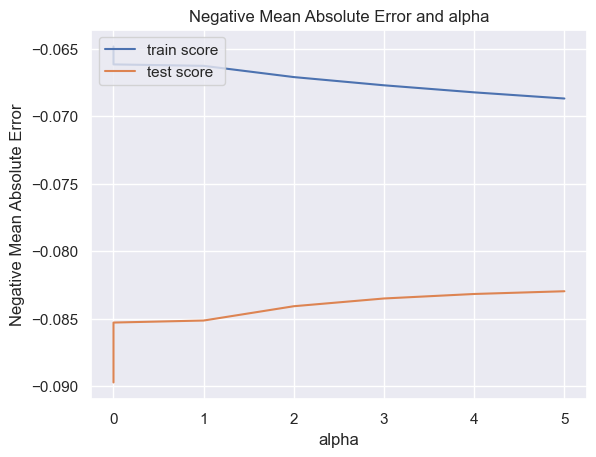

In [71]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [72]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01649853,  0.0088937 ,  0.02524797,  0.06463646,  0.0513517 ,
       -0.00176981,  0.03030078,  0.00746038,  0.0364794 ,  0.03975284,
        0.04782117,  0.00524034,  0.07596026,  0.01154676, -0.00098746,
        0.00887024,  0.0123533 ,  0.00026508, -0.00560485,  0.00299036,
        0.02089848,  0.01349828, -0.00118693,  0.0122071 ,  0.00494729,
        0.01416796,  0.00977661, -0.07020188,  0.14804847,  0.10500438,
        0.12464833,  0.09688984,  0.00268616, -0.02029245,  0.0001522 ,
        0.01232038, -0.02094282,  0.00305142,  0.01702966, -0.02135889,
       -0.0512683 , -0.02402389,  0.01018233, -0.03859959, -0.01515178,
       -0.02377823,  0.00878827,  0.03756686, -0.00792927,  0.11336587,
       -0.05621847, -0.01027416, -0.0866234 , -0.11281661, -0.04189074,
       -0.01885834,  0.04781242, -0.02120294,  0.03621397,  0.04400527,
       -0.05307299, -0.04652574, -0.00828894,  0.0041278 ,  0.022927  ,
        0.09317589, -0.00360059,  0.0375014 ,  0.01458405,  0.06

In [73]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.746),
 ('MSSubClass', -0.016),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.065),
 ('OverallCond', 0.051),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.007),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.003),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('prAge', -0.07),
 ('MSZoning_FV', 0.148),
 ('MSZoning_RH', 0.105),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.097),
 ('LotShape_IR2', 0.003),
 ('LotShape_IR3', -0.02),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 ('LotConfi

In [74]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9364051487631482
0.9076480934584303


In [75]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1149273262696572


In [76]:
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.746
29,MSZoning_FV,0.148
31,MSZoning_RL,0.125
50,Neighborhood_Crawfor,0.113
30,MSZoning_RH,0.105
...,...,...
172,KitchenQual_TA,-0.081
53,Neighborhood_IDOTRR,-0.087
94,Exterior1st_BrkComm,-0.096
83,HouseStyle_2.5Fin,-0.100


In [77]:
### Observation:
#### Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test, 
#### it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
#### the predictive variables.

In [78]:
pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred

,Variable,Coeff
C,constant,12.003
x1,GrLivArea,0.125
x2,OverallQual,0.112
x3,OverallCond,0.050
x4,TotalBsmtSF,0.042
x5,BsmtFinSF1,0.035
x6,GarageArea,0.034
x7,Fireplaces,0.024
x8,LotArea,0.015
x9,LotFrontage,0.014


### Equation:
    
####    Log(Y) = C + 0.125(x1) + 0.112(x2) +  0.050(x3) + 0.042(x4) + 0.035(x5) + 0.034(x6) + 0.024(x7) +  0.015(x8) + 0.014(x9) + 0.010(x10)
####                + 0.010(x11) + 0.005(x12) - 0.007(x13) - 0.007(x14) - 0.008(x15) - 0.095(x16) + Error term(RSS + alpha * (sum of absolute value of coefficients)


### INFERENCE
#### Suggestion is to keep a check on these predictors affecting the price of the house.

#### The higher values of positive coeeficients suggest a high sale value.

#### Some of those features are:-
 ###  Feature  -  Description  
 
 ###  GrLivArea  -  Above grade (ground) living area square feet  
  ### OverallQual  -  Rates the overall material and finish of the house  
  ### OverallCond  -  Rates the overall condition of the house  
  ### TotalBsmtSF   -  Total square feet of basement area  
  ###  GarageArea    - Size of garage in square feet  
        
#### The higher values of negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
     ### Feature  -  Description  
  
     ### prAge  -  Age of the property 
     ### MSSubClass  -  Identifies the type of dwelling involved in the sale
    

#### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.
